In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 一个小例子

In [2]:
w = tf.Variable(tf.constant(5,dtype=tf.float32)) # 设置参数w为变量，随机初始值为5
lr = 0.4 # 学习率
epoch = 15 # 迭代次数
for epoch in range(epoch): 
    # 梯度带(Gradientape) 根据某个函数的输入变量来计算它的导数（梯度）。
    with tf.GradientTape() as tape:
        loss = tf.square(w + 1)
    dloss_dw = tape.gradient(loss,w) # gradient(),告诉tape谁对谁求导
    w.assign_sub(lr * dloss_dw) # 对变量做自更新,即：w = w - lr * dloss_dw
    # 这一步相当于一个optimizer的原理
    print("在%s步之后,w的值为%f,loss的值为%f" % (epoch, w.numpy(), loss))
    
# lr初始值：0.2   请自改学习率  0.001  0.999 看收敛过程
# 最终目的：找到 loss 最小 即 w = -1 的最优参数w

在0步之后,w的值为0.200000,loss的值为36.000000
在1步之后,w的值为-0.760000,loss的值为1.440000
在2步之后,w的值为-0.952000,loss的值为0.057600
在3步之后,w的值为-0.990400,loss的值为0.002304
在4步之后,w的值为-0.998080,loss的值为0.000092
在5步之后,w的值为-0.999616,loss的值为0.000004
在6步之后,w的值为-0.999923,loss的值为0.000000
在7步之后,w的值为-0.999985,loss的值为0.000000
在8步之后,w的值为-0.999997,loss的值为0.000000
在9步之后,w的值为-0.999999,loss的值为0.000000
在10步之后,w的值为-1.000000,loss的值为0.000000
在11步之后,w的值为-1.000000,loss的值为0.000000
在12步之后,w的值为-1.000000,loss的值为0.000000
在13步之后,w的值为-1.000000,loss的值为0.000000
在14步之后,w的值为-1.000000,loss的值为0.000000


# 数据类型
+ 数学型：tf.int32, tf.float32, tf.float64
+ 布尔型：tf.constant([True, False])
+ 字符串型：tf.constant(“Hello, world!”)

# 创建张量
### 1.直接创建

In [29]:
a=tf.constant([[1,5],[3,4]],dtype=tf.int64)

print(a)
print(a.dtype)
print(a.shape,'逗号隔开了两个数字→二维张量。数字2表示张量里有两个元素')

tf.Tensor(
[[1 5]
 [3 4]], shape=(2, 2), dtype=int64)
<dtype: 'int64'>
(2, 2) 逗号隔开了两个数字→二维张量。数字2表示张量里有两个元素


### 2.numpy转换为Tensor

In [30]:
a = np.arange(0, 5)
b = tf.convert_to_tensor( a, dtype=tf.int64 )
print(a)
print(b)

[0 1 2 3 4]
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


### 3.创建全为x的张量

In [31]:
# 一维  直接写个位数
# 二维 用 [ 行，列]
# 多维 用 [n,m,j,k……]每维度的元素个数
a = tf.zeros([2, 3])
b = tf.ones(4)
c = tf.fill([2, 2], 9)
print(a)
print(b)
print(c)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


### 4.正态分布的张量
**tf.random.normal ( 维度，mean= 均值，stddev= 标准差, dtype=数字类型)**
### 5.更为集中的正太分布张量
**（随机生成数据的取值在均值的±2倍标准差之内）**  
**tf.random.truncated_normal ( 维度，mean= 均值，stddev= 标准差, dtype=数字类型)**

In [32]:
d = tf.random.normal([2, 2], mean=0.5, stddev=1)
print("d:", d)
e = tf.random.truncated_normal([2, 2], mean=0.5, stddev=1)
print("e:", e)

d: tf.Tensor(
[[ 0.04298776  0.09313273]
 [ 1.2285777  -0.39297777]], shape=(2, 2), dtype=float32)
e: tf.Tensor(
[[ 2.1940167   0.61969316]
 [-0.65846     0.672604  ]], shape=(2, 2), dtype=float32)


### 6.均匀分布随机数张量
**tf.random.uniform( 维度，minval=最小值，maxval=最大值)**(前闭后开)

In [33]:
f = tf.random.uniform([2, 2], minval=0, maxval=3, dtype=tf.int32)
print(f)

tf.Tensor(
[[2 2]
 [2 1]], shape=(2, 2), dtype=int32)


# 常用函数
### 1.强制转化数字类型

In [34]:
x1 = tf.constant([1.48648, 2.031546484648, 3.998448418464848],dtype=tf.float64)
x2 = tf.cast (x1, tf.int32)
x3 = tf.cast (x2, tf.float64)
print('原张量：',x1)
print('强制转化为整形：',x2)
print('再强制转化为浮点型：',x3)

原张量： tf.Tensor([1.48648    2.03154648 3.99844842], shape=(3,), dtype=float64)
强制转化为整形： tf.Tensor([1 2 3], shape=(3,), dtype=int32)
再强制转化为浮点型： tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)


### 2.计算张量维度上元素的最小值、最大值

In [35]:
x1 = tf.constant([[1,2,3], [4,5,6], [7,8,9]],dtype=tf.int32)
min = tf.reduce_min(x1)
max = tf.reduce_max(x1)
print('原张量：', x1, '\n最小值：', min, '\n最大值：',max)

原张量： tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32) 
最小值： tf.Tensor(1, shape=(), dtype=int32) 
最大值： tf.Tensor(9, shape=(), dtype=int32)


### 3.axis=0,1 操作方向函数
+  axis=0→操作列，axis=1→操作行。

In [36]:
x1 = tf.constant([[1,2,3], [1,2,3], [1,2,3]],dtype=tf.int32)
print('纵向求和：', tf.reduce_sum(x1, axis=0))
print('横向求和：', tf.reduce_sum(x1, axis=1))
print('所有求平均', tf.reduce_mean(x1))

纵向求和： tf.Tensor([3 6 9], shape=(3,), dtype=int32)
横向求和： tf.Tensor([6 6 6], shape=(3,), dtype=int32)
所有求平均 tf.Tensor(2, shape=(), dtype=int32)


### 4.tf.Variable() “可训练”的变量

In [37]:
w = tf.Variable(tf.random.normal([2, 2], mean=0, stddev=100))
print('一个服从正态分布的可训练变量：\n', w)

一个服从正态分布的可训练变量：
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-117.71783  ,  -90.32594  ],
       [  84.19609  ,   -6.8709483]], dtype=float32)>


### 5.TensorFlow中的数学运算
四则运算：tf.add,  tf.subtract,  tf.multiply,  tf.divide  
平方、次方、开方： tf.square,  tf.pow,  tf.sqrt  
矩阵乘：tf.matmul  

In [38]:
a = tf.fill([1, 3], 3.)
b = tf.ones([1, 3])
print(a)
print(b)
print('加：',    tf.add(a,b))
print('减：',    tf.subtract(a,b))
print('乘：',    tf.multiply(a,b))
print('除：',    tf.divide(a,b))
print('三次方：',tf.pow(a, 3))
print('平方：',  tf.square(a))
print('开方：',  tf.sqrt(a))
print('-------------------------------')
c = tf.ones([3, 2])
d = tf.fill([2, 3], 3.)
print(c)
print(d)
print('矩阵相乘：',tf.matmul(c, d))

tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
加： tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
减： tf.Tensor([[2. 2. 2.]], shape=(1, 3), dtype=float32)
乘： tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
除： tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
三次方： tf.Tensor([[27. 27. 27.]], shape=(1, 3), dtype=float32)
平方： tf.Tensor([[9. 9. 9.]], shape=(1, 3), dtype=float32)
开方： tf.Tensor([[1.7320508 1.7320508 1.7320508]], shape=(1, 3), dtype=float32)
-------------------------------
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[3. 3. 3.]
 [3. 3. 3.]], shape=(2, 3), dtype=float32)
矩阵相乘： tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


### 6.人工（特征←→标签）配对
**data = tf.data.Dataset.from_tensor_slices(( 输入特征,  标签))**  
切分传入张量的第一维度，生成输入特征/标签对  
(Numpy 和Tensor格式都可用该语句读入数据)

In [39]:
features = tf.constant([12,23,10,17])
labels   = tf.constant([0, 1, 1, 0])
DataSet = tf.data.Dataset.from_tensor_slices((features, labels))
print('特征集：', DataSet, '\n------------------------------------')
for match in DataSet:
    print('特征对：',match)
print('=============================================================================')
for i,(features,labels) in enumerate(DataSet):
    print('第{}个特征对：\n特征：{}，\n标签：{}\n---------'.format(i,features,labels))

特征集： <TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)> 
------------------------------------
特征对： (<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
特征对： (<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
特征对： (<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
特征对： (<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
第0个特征对：
特征：12，
标签：0
---------
第1个特征对：
特征：23，
标签：1
---------
第2个特征对：
特征：10，
标签：1
---------
第3个特征对：
特征：17，
标签：0
---------


### 7.tf.GradientTape(y,x) 求张量的梯度（求导）
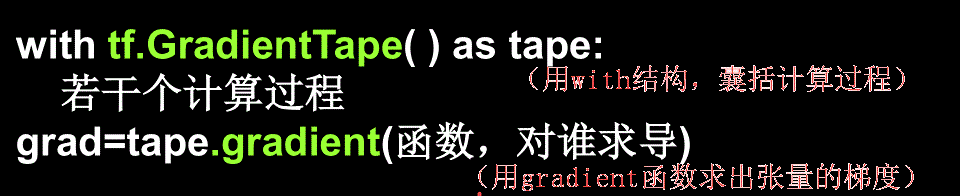

In [40]:
with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.00))
    loss = tf.pow(w, 2)
grad = tape.gradient(loss, w)
print('函数loss在w=3.00时的梯度（导数）为：',grad)

函数loss在w=3.00时的梯度（导数）为： tf.Tensor(6.0, shape=(), dtype=float32)


### 8.enumerate（）→Python自带的遍历函数
**它可遍历每个列表、元组、字符串， 常在for循环中使用。**  
**for i, element in enumerate()**

In [41]:
str = 'abc'
list = ['d', 'e', 'f']
tuple = ('h', 'i', 'j')
for i,element in enumerate(str):
    print(i,element)
for i,element in enumerate(list):
    print(i,element)
for i,element in enumerate(tuple):
    print(i,element)

0 a
1 b
2 c
0 d
1 e
2 f
0 h
1 i
2 j


### 9.tf.one_hot() 独热编码one-hot encoding
在分类问题中，常用独热码做标签。标记类别：1表示是，0表示非。  
**tf.one_hot(待转换数据, depth=几分类)**
0. 什么情况下用独热编码？
1. 用：独热编码用来解决类别型数据的离散值问题。如：男、女
2. 不用：如果特征是离散的，并且不用one-hot编码就可以很合理的计算出距离，那么就没必要进行one-hot编码。如：第一宇宙速度、第二宇宙速度

In [42]:
classes = 8
labels = tf.constant([0,1,2,3,4,5,6]) #  输入的元素值最小为0 ，最大为2
output = tf.one_hot(labels, depth=classes)
print(output)

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]], shape=(7, 8), dtype=float32)


### 10.tf.nn.softmax() 使输出的结果符合概率分布
使经过神经层计算输出 符合概率分布  
如下如所示：
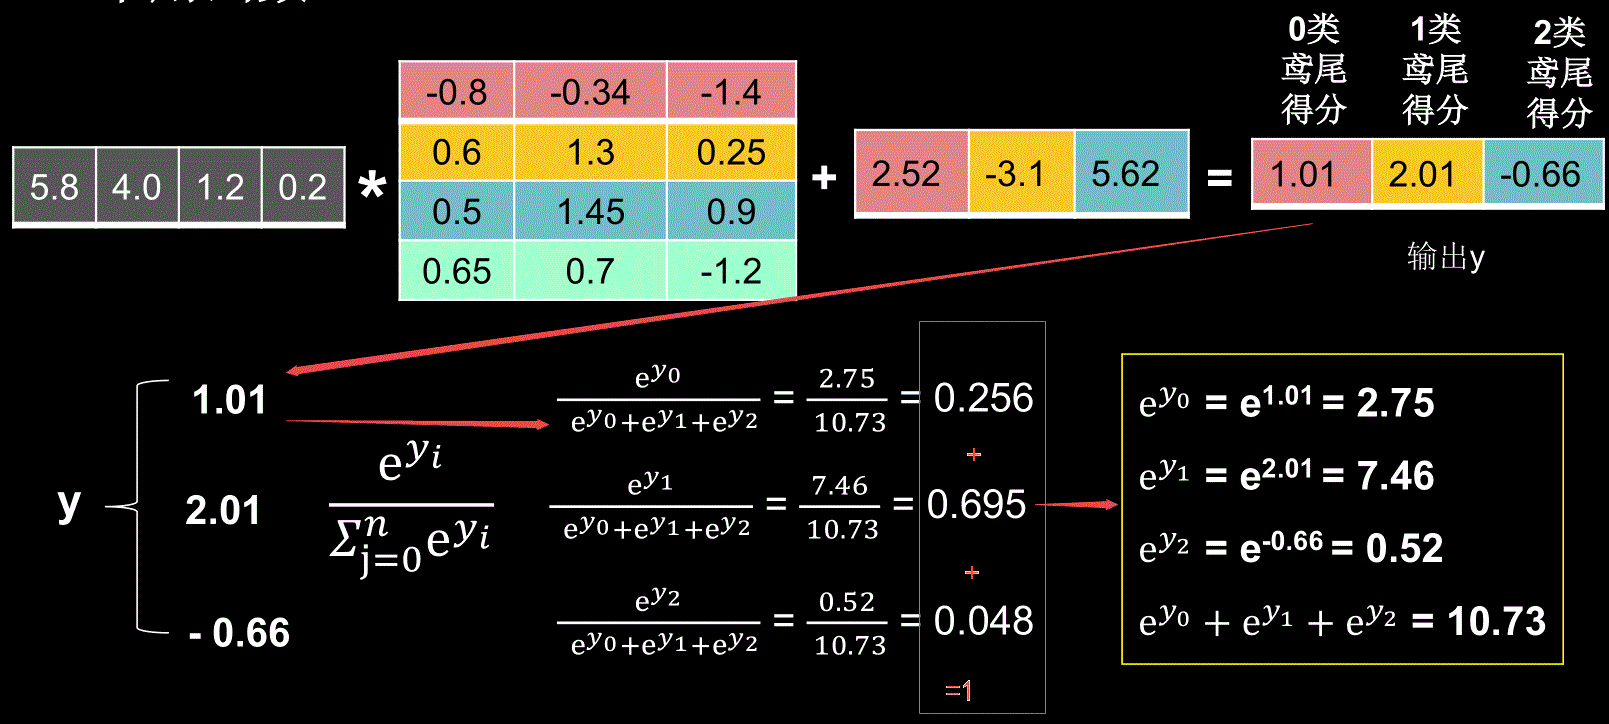

In [43]:
y = tf.constant([1.01, 2.01, -0.66])
y_softmax = tf.nn.softmax(y)
print("y在softmax后, 输出的值是:\n", y_softmax)
'''0.256 + 0.695 + 0.048 = 1.0'''

y在softmax后, 输出的值是:
 tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)


'0.256 + 0.695 + 0.048 = 1.0'

### 11.assign_sub() 自我更新函数，（自减函数）
w.assign_sub(w自减的内容)，w 必须是tf.Variable可训练变量

In [44]:
w = tf.Variable(4)
for i in range(3):
    w.assign_sub(1) # ==> w -= 1
    print(w)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


### 12.tf.argmax(张量名, axis=操作轴)
**张量沿指定维度最大值的索引**

In [45]:
x = np.array([[200, 100, 100], [100, 0, 0], [100, 0, 0], [100, 0, 200]])
print(x)
print('每一列最大值的索引:', tf.argmax(x, axis=0))
print('每一行最大值的索引:', tf.argmax(x, axis=1))

[[200 100 100]
 [100   0   0]
 [100   0   0]
 [100   0 200]]
每一列最大值的索引: tf.Tensor([0 0 3], shape=(3,), dtype=int64)
每一行最大值的索引: tf.Tensor([0 0 0 2], shape=(4,), dtype=int64)


# 练习：神经网络实现鸢尾花(Iris)的分类
## sklearn机器学习框架包
sklearn是一个Python第三方提供的非常强力的机器学习库，它包含了从数据预处理到训练模型的各个方面。在实战使用sklearn中可以极大的节省我们编写代码的时间以及减少我们的代码量，使我们有更多的精力去分析数据分布，调整模型和修改超参。

In [46]:
# ----------------------------------查看数据------------------------------------
# 导入鸢尾花数据集的练习包
from sklearn.datasets import load_iris
# 获取iris数据集所有"输入特征"
x_data = load_iris().data
# 获取iris数据集所有"标签"
y_data = load_iris().target
print('鸢尾花所有的输入特征:\n', x_data, '\n----------------------------')
print('鸢尾花所有的标签:\n', y_data)

Iris = pd.DataFrame(x_data, columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽度'])
Iris['类别'] = y_data
Iris

鸢尾花所有的输入特征:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


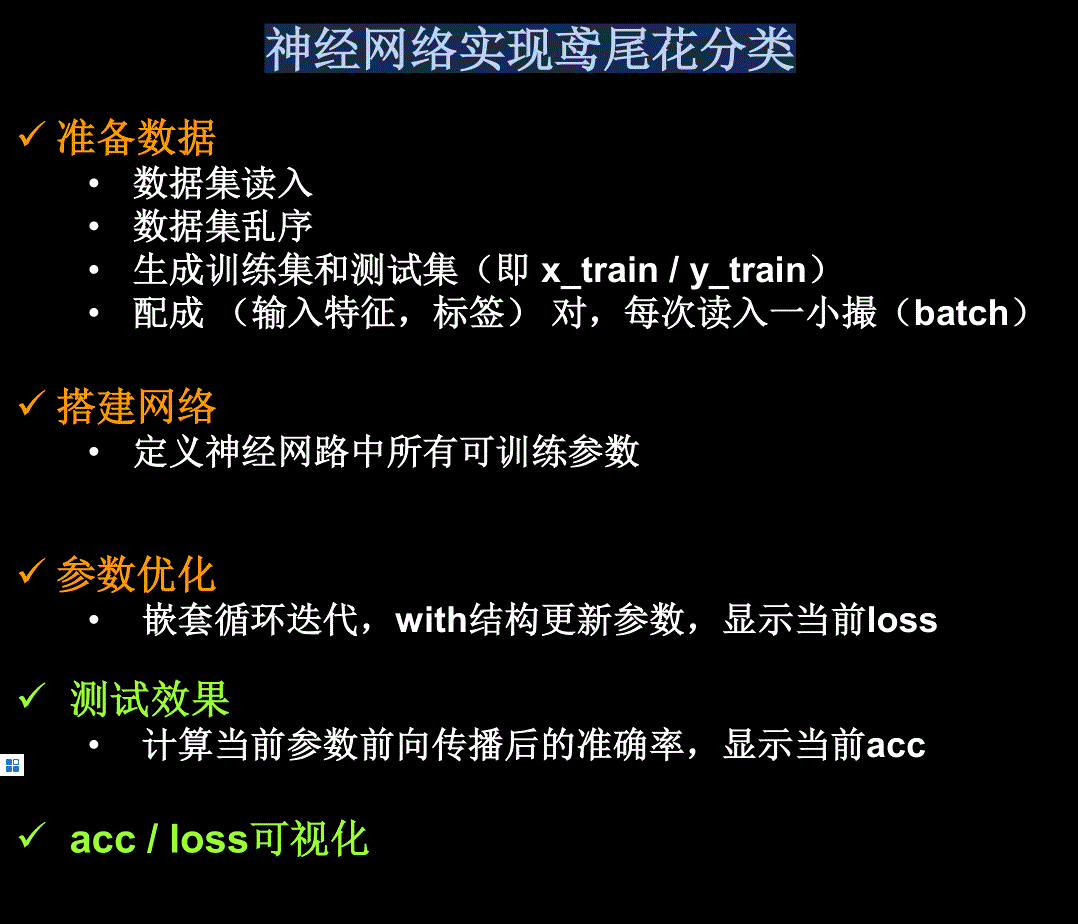

大步数：第0步, 平均平方误差: 0.24311384931206703
test准确率: 0.23333333333333334
--------------------------
大步数：第1步, 平均平方误差: 0.2284178026020527
test准确率: 0.23333333333333334
--------------------------
大步数：第2步, 平均平方误差: 0.21540122479200363
test准确率: 0.23333333333333334
--------------------------
大步数：第3步, 平均平方误差: 0.20340262353420258
test准确率: 0.5666666666666667
--------------------------
大步数：第4步, 平均平方误差: 0.19166241213679314
test准确率: 0.5666666666666667
--------------------------
大步数：第5步, 平均平方误差: 0.18072841688990593
test准确率: 0.5666666666666667
--------------------------
大步数：第6步, 平均平方误差: 0.17102178186178207
test准确率: 0.5666666666666667
--------------------------
大步数：第7步, 平均平方误差: 0.16265176981687546
test准确率: 0.5666666666666667
--------------------------
大步数：第8步, 平均平方误差: 0.1555306315422058
test准确率: 0.5666666666666667
--------------------------
大步数：第9步, 平均平方误差: 0.14949066564440727
test准确率: 0.5666666666666667
--------------------------
大步数：第10步, 平均平方误差: 0.14435181766748428
test准确率: 0.5666666666666667
-------------

test准确率: 0.9333333333333333
--------------------------
大步数：第94步, 平均平方误差: 0.06931165978312492
test准确率: 0.9333333333333333
--------------------------
大步数：第95步, 平均平方误差: 0.06894782744348049
test准确率: 0.9333333333333333
--------------------------
大步数：第96步, 平均平方误差: 0.06858807429671288
test准确率: 0.9333333333333333
--------------------------
大步数：第97步, 平均平方误差: 0.06823235098272562
test准确率: 0.9333333333333333
--------------------------
大步数：第98步, 平均平方误差: 0.0678805923089385
test准确率: 0.9333333333333333
--------------------------
大步数：第99步, 平均平方误差: 0.06753275450319052
test准确率: 0.9333333333333333
--------------------------
大步数：第100步, 平均平方误差: 0.06718877051025629
test准确率: 0.9666666666666667
--------------------------
大步数：第101步, 平均平方误差: 0.06684859842061996
test准确率: 0.9666666666666667
--------------------------
大步数：第102步, 平均平方误差: 0.06651217769831419
test准确率: 0.9666666666666667
--------------------------
大步数：第103步, 平均平方误差: 0.06617946363985538
test准确率: 0.9666666666666667
--------------------------
大步数：第104步, 平

大步数：第182步, 平均平方误差: 0.04823355097323656
test准确率: 0.9666666666666667
--------------------------
大步数：第183步, 平均平方误差: 0.0480801947414875
test准确率: 0.9666666666666667
--------------------------
大步数：第184步, 平均平方误差: 0.04792810697108507
test准确率: 0.9666666666666667
--------------------------
大步数：第185步, 平均平方误差: 0.0477772643789649
test准确率: 0.9666666666666667
--------------------------
大步数：第186步, 平均平方误差: 0.04762767627835274
test准确率: 0.9666666666666667
--------------------------
大步数：第187步, 平均平方误差: 0.04747930262237787
test准确率: 0.9666666666666667
--------------------------
大步数：第188步, 平均平方误差: 0.04733213223516941
test准确率: 0.9666666666666667
--------------------------
大步数：第189步, 平均平方误差: 0.047186169773340225
test准确率: 0.9666666666666667
--------------------------
大步数：第190步, 平均平方误差: 0.04704137146472931
test准确率: 0.9666666666666667
--------------------------
大步数：第191步, 平均平方误差: 0.04689774848520756
test准确率: 0.9666666666666667
--------------------------
大步数：第192步, 平均平方误差: 0.04675528034567833
test准确率: 0.96666666666

大步数：第269步, 平均平方误差: 0.0384154012426734
test准确率: 0.9666666666666667
--------------------------
大步数：第270步, 平均平方误差: 0.03833300620317459
test准确率: 0.9666666666666667
--------------------------
大步数：第271步, 平均平方误差: 0.03825111407786608
test准确率: 0.9666666666666667
--------------------------
大步数：第272步, 平均平方误差: 0.03816972300410271
test准确率: 0.9666666666666667
--------------------------
大步数：第273步, 平均平方误差: 0.038088828325271606
test准确率: 0.9666666666666667
--------------------------
大步数：第274步, 平均平方误差: 0.03800841514021158
test准确率: 0.9666666666666667
--------------------------
大步数：第275步, 平均平方误差: 0.037928491830825806
test准确率: 0.9666666666666667
--------------------------
大步数：第276步, 平均平方误差: 0.03784904442727566
test准确率: 0.9666666666666667
--------------------------
大步数：第277步, 平均平方误差: 0.0377700780518353
test准确率: 0.9666666666666667
--------------------------
大步数：第278步, 平均平方误差: 0.037691584788262844
test准确率: 0.9666666666666667
--------------------------
大步数：第279步, 平均平方误差: 0.037613555788993835
test准确率: 0.96666666

大步数：第357步, 平均平方误差: 0.032685769721865654
test准确率: 0.9666666666666667
--------------------------
大步数：第358步, 平均平方误差: 0.03263453906401992
test准确率: 0.9666666666666667
--------------------------
大步数：第359步, 平均平方误差: 0.032583548687398434
test准确率: 0.9666666666666667
--------------------------
大步数：第360步, 平均平方误差: 0.03253280185163021
test准确率: 0.9666666666666667
--------------------------
大步数：第361步, 平均平方误差: 0.03248229902237654
test准确率: 0.9666666666666667
--------------------------
大步数：第362步, 平均平方误差: 0.03243202483281493
test准确率: 0.9666666666666667
--------------------------
大步数：第363步, 平均平方误差: 0.03238199232146144
test准确率: 0.9666666666666667
--------------------------
大步数：第364步, 平均平方误差: 0.03233219310641289
test准确率: 0.9666666666666667
--------------------------
大步数：第365步, 平均平方误差: 0.032282627653330564
test准确率: 0.9666666666666667
--------------------------
大步数：第366步, 平均平方误差: 0.03223329083994031
test准确率: 0.9666666666666667
--------------------------
大步数：第367步, 平均平方误差: 0.03218418685719371
test准确率: 0.9666666

大步数：第444步, 平均平方误差: 0.028982081916183233
test准确率: 0.9666666666666667
--------------------------
大步数：第445步, 平均平方误差: 0.02894681878387928
test准确率: 0.9666666666666667
--------------------------
大步数：第446步, 平均平方误差: 0.02891169162467122
test准确率: 0.9666666666666667
--------------------------
大步数：第447步, 平均平方误差: 0.02887669624760747
test准确率: 0.9666666666666667
--------------------------
大步数：第448步, 平均平方误差: 0.028841836377978325
test准确率: 0.9666666666666667
--------------------------
大步数：第449步, 平均平方误差: 0.02880711294710636
test准确率: 0.9666666666666667
--------------------------
大步数：第450步, 平均平方误差: 0.028772522695362568
test准确率: 0.9666666666666667
--------------------------
大步数：第451步, 平均平方误差: 0.02873806282877922
test准确率: 0.9666666666666667
--------------------------
大步数：第452步, 平均平方误差: 0.028703734278678894
test准确率: 0.9666666666666667
--------------------------
大步数：第453步, 平均平方误差: 0.028669539373368025
test准确率: 0.9666666666666667
--------------------------
大步数：第454步, 平均平方误差: 0.028635469265282154
test准确率: 0.9666

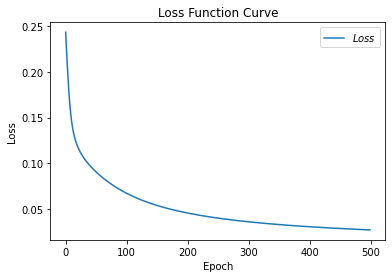

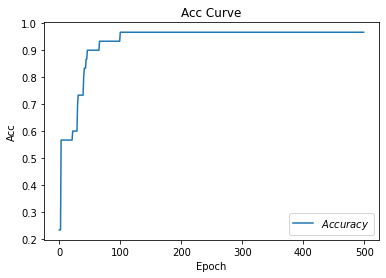

In [47]:
# ====================================训练========================================
# ----------------------------------准备数据--------------------------------------
from sklearn.datasets import load_iris
# 1.数据集读入
x_data = load_iris().data    # 获取iris数据集所有"输入特征"
y_data = load_iris().target  # 获取iris数据集所有"标签"
# 2.数据集乱序
np.random.seed(1)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(1)
np.random.shuffle(y_data)
tf.random.set_seed(1)
# 3.生成训练集和测试集（永无交集）
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
# 4.强制转换数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
# 5.配成(输入特征-标签)对，每次读入一小撮（batch）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db  = tf.data.Dataset.from_tensor_slices((x_test,  y_test )).batch(32) # 以batch为单位喂入神经网络
# ----------------------------------搭建网络--------------------------------------
# 1.定义 可训练参数
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1))
# ----------------------------------参数优化--------------------------------------
# ---嵌套循环迭代，with 结构更新参数，显示当前loss---

# 1.--定超参数、画图参数--

lr = 0.1  # 学习率为0.1
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据

# 2.--训练部分--
for epoch in range(epoch):  # epoch：数据集级别的循环，每次循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每次循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1]) # 损失loss分别对w1，b1求导数
        
        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新
        
    # 每个epoch，打印loss信息
    print("大步数：第{}步, 平均平方误差: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
    
    
    
    # -----------------------------------------测试效果-----------------------------------------------
    
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("test准确率:", acc)
    print("--------------------------")
    

# -----------------------------------------画图-----------------------------------------------
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 老师说这段代码很重要！！要求能背下来！

# np.random.seed(n)随机数种子的原理

In [48]:
a=np.random.randint(1,10,size=5)
b=np.random.randint(1,10,size=5)
np.random.seed(1) # 参数随便填，只影响从哪里开始取随机
c=np.random.randint(1,10,size=5)
np.random.seed(1) # 只是必须保持一致
d=np.random.randint(1,10,size=5)
e=np.random.randint(1,10,size=5)
a,b,c,d,e

(array([5, 1, 8, 9, 6]),
 array([8, 1, 4, 2, 5]),
 array([6, 9, 6, 1, 1]),
 array([6, 9, 6, 1, 1]),
 array([2, 8, 7, 3, 5]))